In [1]:
from functools import partial
from src.IAMDataset import IAMDataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt



In [5]:
dataset = IAMDataset("/Users/tefannastasa/BachelorsWorkspace/BachModels/BachModels/data/raw", "form" ,"train", None, True)
eos_tkn_id, sos_tkn_id, pad_tkn_id = dataset.label_enc.encode_labels([dataset._eos_token, dataset._sos_token, dataset._pad_token])
collate_fn = partial(IAMDataset.collate_fn, pad_val=pad_tkn_id, eos_tkn_idx=eos_tkn_id, returns_writer_id=dataset._return_writer_id)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True, collate_fn=collate_fn)


In [ ]:
imgs = []
for sample in dataset:
    imgs.append(sample[0])
print(len(imgs))

In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(20, 20))  # Adjust figsize as needed
for i, ax in enumerate(axes.flat):
    if i < len(imgs):
        np = imgs[i+50]
        ax.imshow(np, cmap="Greys")
        ax.axis('off')  
    else:
        ax.axis('off')  

In [9]:
from src.IAMDataset import IAMDatasetSynthetic
from tqdm import tqdm

synth = IAMDatasetSynthetic(dataset, nr_of_samples=5000)
imgs = []
for sample in tqdm(synth):
    imgs.append(sample[0])
print(len(imgs))

100%|██████████| 5000/5000 [02:18<00:00, 35.99it/s]

5000


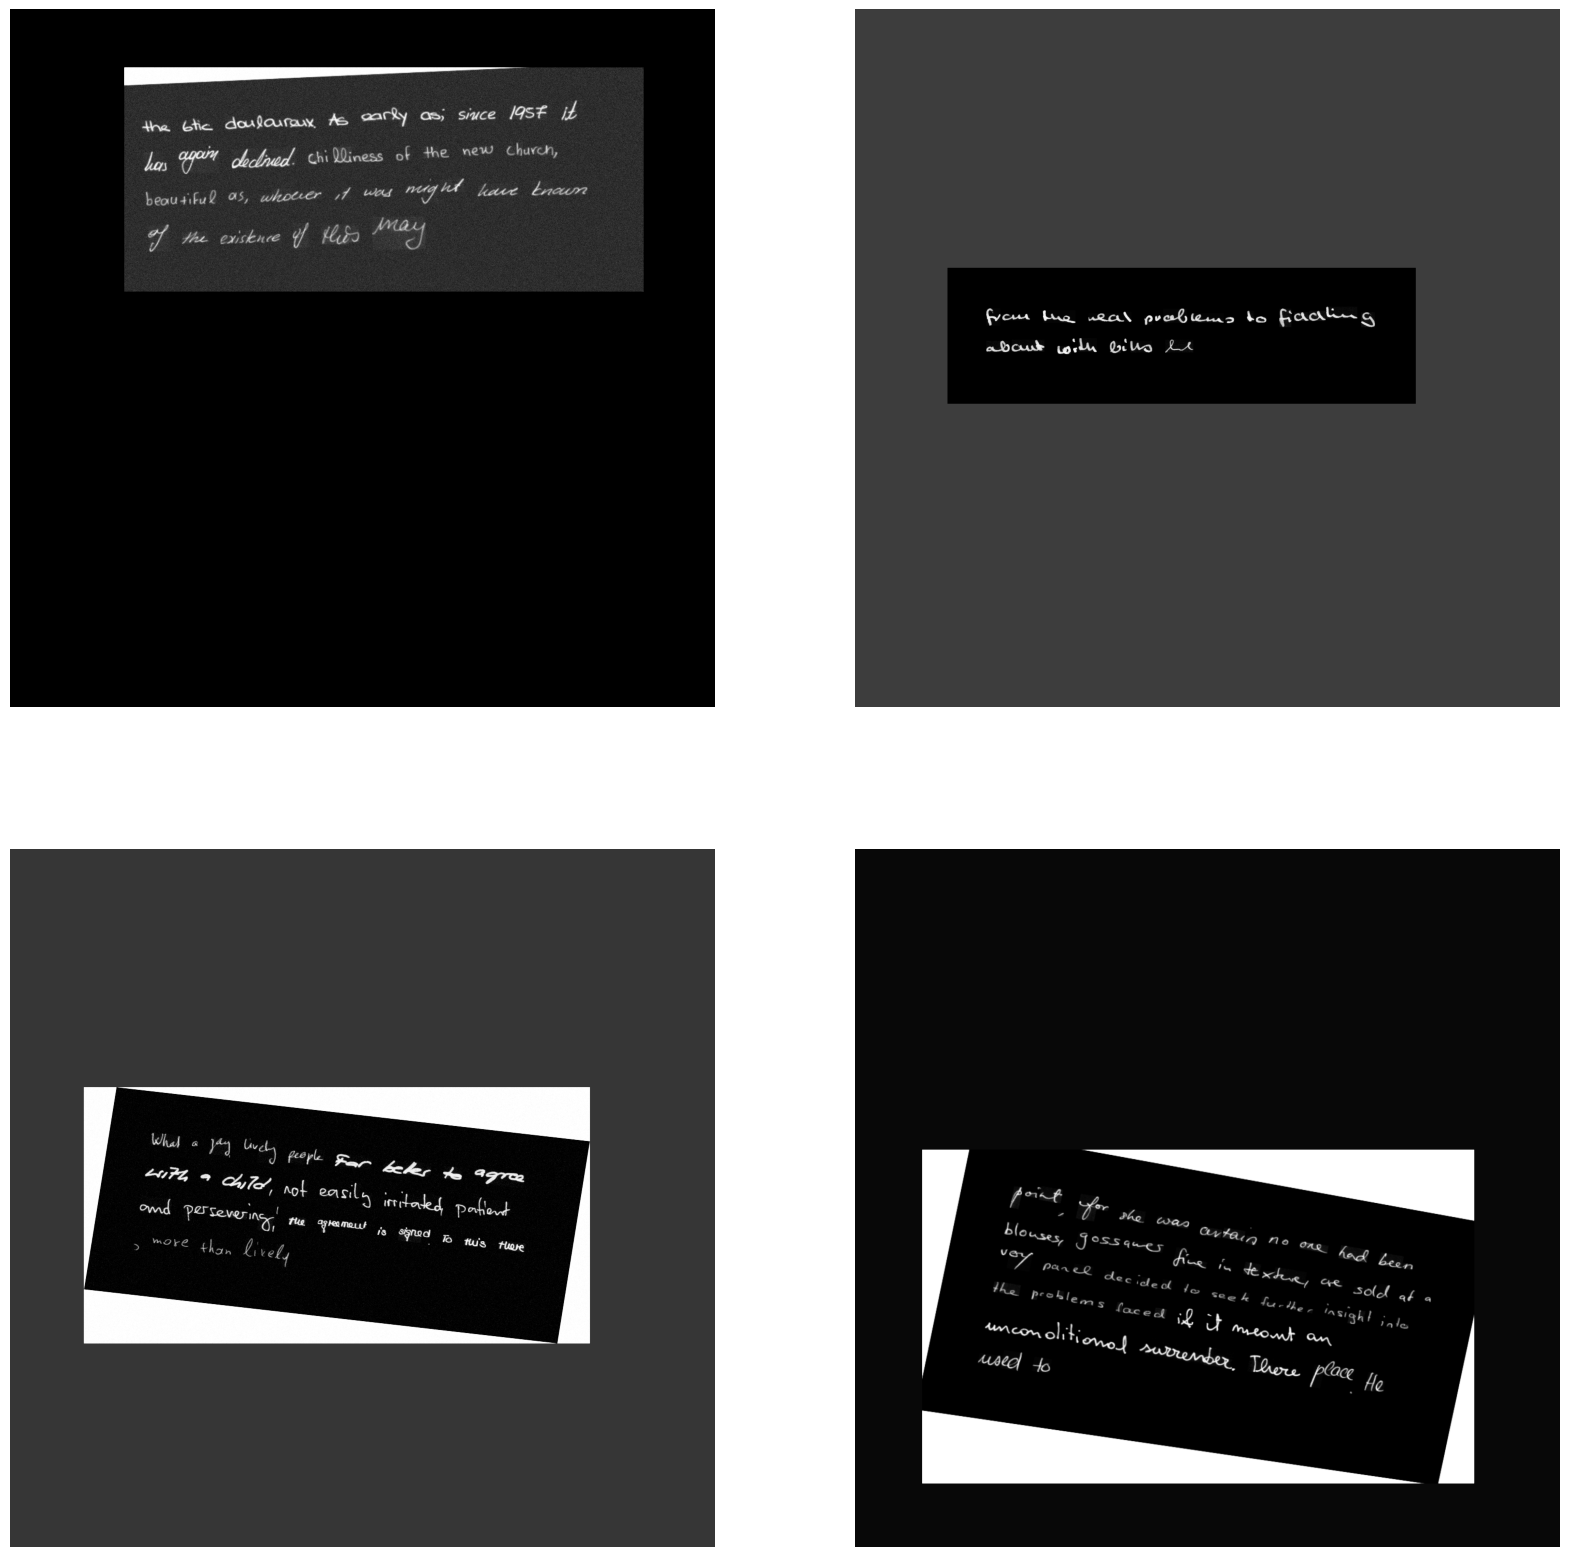

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))  # Adjust figsize as needed
for i, ax in enumerate(axes.flat):
    if i < len(imgs):
        np = imgs[i+1600]
        ax.imshow(np, cmap="Greys")
        ax.axis('off')  
    else:
        ax.axis('off')  